# Households with access to the internet at home

Prepared by [**Erico Farias da Silva**](erico_fariass@hotmail.com)

## Tables needed
- Isoc_r_iacc_h

### Settings

Put all libraries/packages/modules/etc... that are necessary so that you can run this notebook.

In [8]:
try:
#  import google.colab
  !pip install eurostatapiclient
except:
  pass

In [9]:
from eurostatapiclient import EurostatAPIClient
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
#from sklearn.linear_model import LinearRegression

legend_properties = {'weight':'bold','size':'12'}
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany',
                   'DK': 'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR': 'France',
                   'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg',
                   'LV':'Latvia', 'MT': 'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania',
                   'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'EU27_2020': 'EU-27', 'UK':'United Kingdom', 'IS':
                   'Iceland', 'CH': 'Switzerland', 'MK': 'North Macedonia', 'TR': 'Turkey'}
countries_abbr = ['AT','BE','BG','CY','CZ','DE','DK','EE','EL','ES','FI', 'FR','HR','HU','IE','IT','LT','LU','LV',
                  'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'EU27_2020', 'UK', 'IS', 'CH', 'MK', 'TR']

In [10]:
# Set version, format and language
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
# call client
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [11]:
# Set colors
c_tot = '#f4c95d'
c_mal = '#f36744'
c_fem = '#134f67'

# style
plt.style.use('fivethirtyeight')

In [16]:
# Set parameters # AGE == 20~64
params = {
    'geoLevel':'nuts2', #'nuts1'?
    'sinceTimePeriod':'2013',
    'precision':'2'
}

dic = {'time' : 'year'}

# GET the data
dataset = client.get_dataset('isoc_r_iacc_h', params=params)
#print(dataset.label)

# Transform into a dataframe
df = dataset.to_dataframe()
df.rename(columns=dic, inplace=True)
df['year'] = df['year'].astype(int)
df = df[df['year']==2019]
print(df.head())


    values   unit   geo  year
6     88.0  PC_HH  AT11  2019
13    92.0  PC_HH  AT12  2019
20    92.0  PC_HH  AT13  2019
27    87.0  PC_HH  AT21  2019
34    86.0  PC_HH  AT22  2019


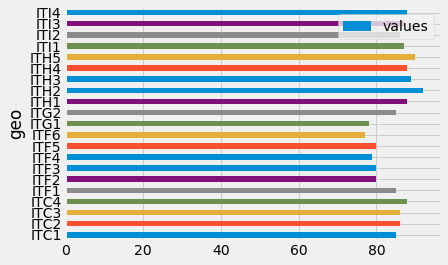

In [17]:
italy_internet = df[df['geo'].str.startswith('IT')]

italy_internet.plot('geo', 'values', kind='barh')

In [283]:
df = df.dropna().reset_index()

keep = ['values', 'geo', 'sex', 'wstatus', 'year']
df = df[keep]

pivoted = df.pivot_table(index=['geo', 'sex'], columns=['wstatus', 'year'], values='values')

pivoted = pivoted.dropna()

pivoted = pivoted.divide(pivoted['POP'], axis=0)

pivoted = pivoted.stack()

#pivoted.index.get_level_values(0)

pivo = pivoted.reset_index()

In [284]:
t_emp = pivo[['geo','year','EMP']]

#pivoted[['geo','year','ACT']]
#pivoted.plot(x=['geo','year'],y='ACT')
#pivoted.plot()

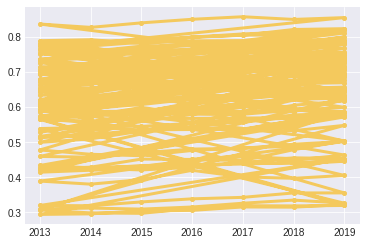

In [294]:
#italy = pd.Series(['IT']*len(t_act), index = t_act.index)

#italy

#t_emp['geo'].str.startswith('IT')

italy_emp = t_emp[t_emp['geo'].str.startswith('IT')]

plt.plot('year', 'EMP', data=italy_emp, marker='o', markersize=4, color=c_tot, linewidth=3, label="Total")

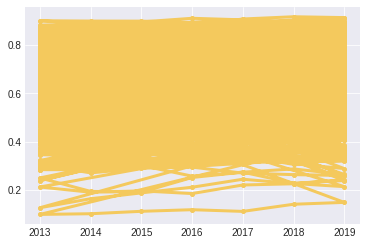

In [286]:
# %matplotlib inline
 
# create a color palette
palette = plt.get_cmap('Set1')

plt.plot('year', 'EMP', data=t_emp, marker='o', markersize=4, color=c_tot, linewidth=3, label="Total")


#plt.show()

In [90]:
#df = df.dropna()

#keep = ['values', 'wstatus', 'geo', 'year']

#females = df[(df['sex']=='F') & (df['citizen']=='TOTAL')][keep]
    #.set_index(['year','geo','wstatus'])
#females['time'] =  pd.to_datetime(females['time'], format='%Y')
#females['year'] = females['time'].dt.year

#males = df[(df['sex']=='M') & (df['citizen']=='TOTAL')][keep]
#total = df[(df['sex']=='T') & (df['citizen']=='TOTAL')][keep]

#print(females.shape, males.shape, total.shape)
#lenght must be equal to len(np.unique(df['geo']))*len(np.unique(df['sex']))*len(np.unique(df['time']))/3

# from what we have, only POP, ACT and EMP are complete
# for UNE, we have missing in females, males and total
# for INAC, we have missing for all and at the same amount
# UNK has no data

# Working with citzen == TOTAL, we have lower discrepancy

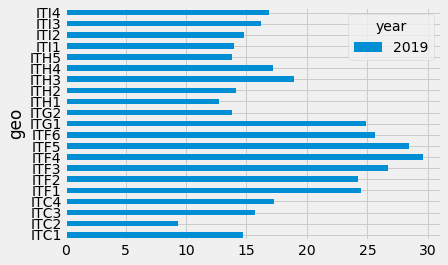

In [24]:
# Working on employment gap

pivoted2 = df2.pivot_table(index='geo', columns='year', values='values')
pivoted2.reset_index(inplace=True)

italy_gap = pivoted2[pivoted2['geo'].str.startswith('IT')][['geo',2019]]

italy_gap.plot('geo', kind='barh')

## General overview

In [6]:
pivot_eu = df_eu.pivot(index='time', columns='sex', values='values').reset_index()
print(pivot_eu.head())

sex    time      F      M      T
0    2006Q1   99.4   99.4   99.4
1    2006Q2   99.8   99.8   99.8
2    2006Q3  100.2  100.2  100.2
3    2006Q4  100.6  100.6  100.6
4    2007Q1  101.3  101.0  101.1


/home/erico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.
/home/erico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'M' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


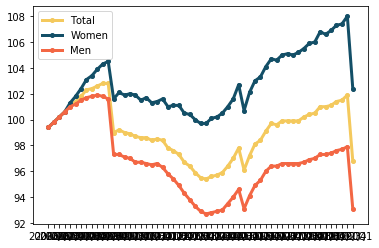

In [7]:
#Graph 1
plt.plot( 'time', 'T', data=pivot_eu, marker='o', markersize=4, color=c_tot, linewidth=3, label="Total")
plt.plot( 'time', 'F', data=pivot_eu, marker='o', markersize=4, color=c_fem, linewidth=3, label="Women")
plt.plot( 'time', 'M', data=pivot_eu, marker='o', markersize=4, color=c_mal, linewidth=3, label="Men")
plt.legend()

# I can work for a better graph
# How to save this graph?

plt.show()

In [11]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%